Lista 2

Dystrybunata rozkładu wykładczniego ma postać:
$$ F(x) = 1 - e^{-\lambda x}$$
Szukamy $F^{-1}(U)$

\begin{equation}
\begin{split}

F(x) &= U \\
1 - e^{-\lambda x} &= U \\
e^{-\lambda x} &= 1 - U \\
-\lambda x &= \ln({1-U}) \\
x &= \frac{-1}{\lambda} ln({1-U})

\end{split}
\end{equation} 
A zatem możemy zapisać dystrybuantę odwrotną jako $$ F^{-1}(U) = \frac{-1}{\lambda} ln({1-U})$$

In [1]:
import numpy as np
def exp_simulation(num, lambda_):
    sample = np.random.rand(num)
    return (-1)/lambda_ * np.log(1-sample)

In [9]:
def exp_pdf(xs,lambda_):
    return lambda_ * np.exp((-1)*lambda_*xs)

In [24]:
def exp_cdf(xs, lambda_):
    return (1 - np.exp((-1)*lambda_*xs))

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon

n = 1000
lambda_ = 2
sample = exp_simulation(n, lambda_)


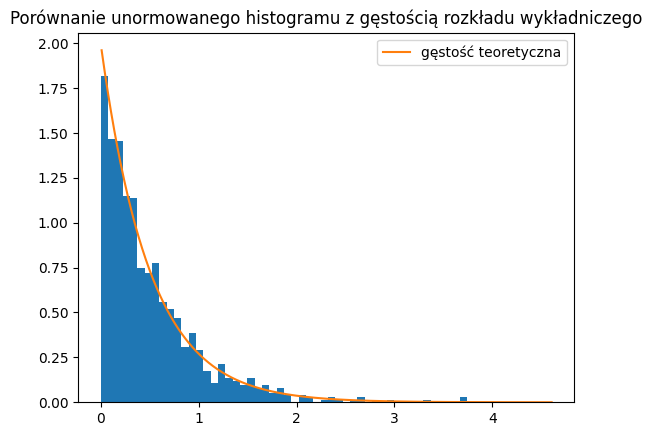

In [22]:
xs = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 1000)

plt.hist(sample, density=True, bins=50)
plt.plot(xs, exp_pdf(xs, lambda_), label="gęstość teoretyczna")
plt.title("Porównanie unormowanego histogramu z gęstością rozkładu wykładniczego")
plt.legend(loc='best')
plt.show()

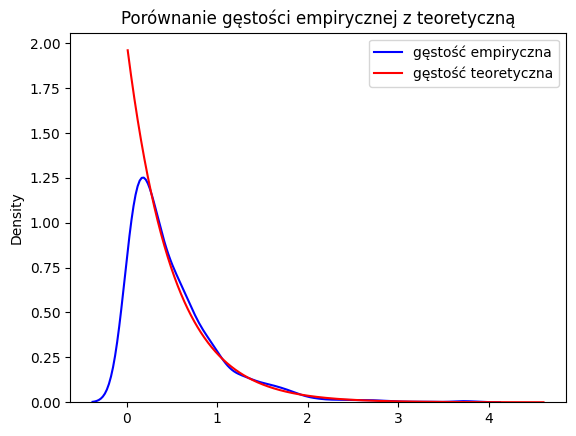

In [23]:
sns.kdeplot(sample, label="gęstość empiryczna", color="blue")
plt.plot(xs, exp_pdf(xs, lambda_), label="gęstość teoretyczna", color="red")
plt.title("Porównanie gęstości empirycznej z teoretyczną")
plt.legend(loc="best")
plt.show()

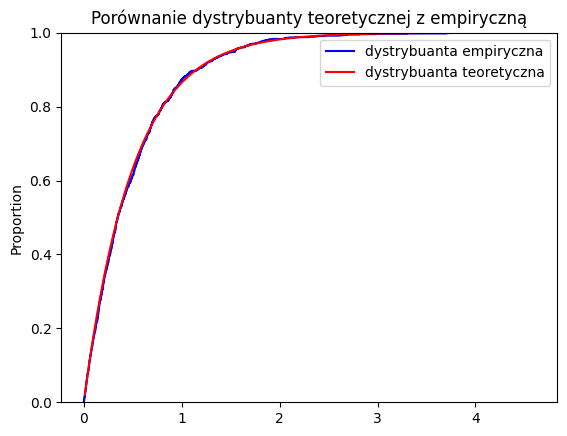

In [25]:
sns.ecdfplot(data=sample, label="dystrybuanta empiryczna", color="blue")
plt.plot(xs, exp_cdf(xs, 2), label='dystrybuanta teoretyczna', color="red")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty teoretycznej z empiryczną")
plt.show()